In [1]:
### import libraries


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',None)

In [ ]:
# Load the Big Game Census data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx", index_col= False, )
big_game_data.head()

,Unnamed: 0,Player Name,Player Jersey Number,Player Position,Player Age,Player Weight (lbs.),Years Played,"Player Birthplace (city, town, etc.)",Player Birth State,Player Birthplace (Combo),Player College,Player Team,Conference,2016 Population Estimates (except where otherwise noted),State GEO ID,Full GEOID,Latitude (player birthplace),Longitude (player birthplace),Number from City,Number of Records,American FactFinder Link for more Census data points,Quickfacts Link,State Data Link,Source (Population States 2017),"Birthplace, Population Data Source"
0,0,Devin McCourty,#32,S/FS,30,195,8,Nanuet,New York,"Nanuet, New York",Rutgers,New England,AFC,18377,36,0400000US36,41.088707,-74.013473,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/N...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
1,1,Danny Amendola,#80,PR/WR/KR,32,190,9,The Woodlands,Texas,"The Woodlands, Texas",Texas Tech,New England,AFC,108373,48,0400000US48,30.173419,-95.504686,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/T...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
2,2,Johnson Bademosi,#29,CB/SPTM/RCB,27,206,6,Silver Spring,Maryland,"Silver Spring, Maryland",Stanford,New England,AFC,78038,24,0400000US24,38.990666,-77.026088,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/S...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
3,3,Chris Hogan,#15,WR,29,210,5,Wyckoff,New Jersey,"Wyckoff, New Jersey",Monmouth,New England,AFC,17119,34,0400000US34,41.009542,-74.172922,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/W...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
4,4,James Develin,#46,RB/FB,29,255,5,Gilbertsville,Pennsylvania,"Gilbertsville, Pennsylvania",Brown,New England,AFC,5084,42,0400000US42,40.320097,-75.610184,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/G...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."


## What is the distribution of Super Bowl 52 players’ birthplaces across different states

In [12]:
# Group by Birth State
state_distribution = big_game_data.groupby('Player Birth State').size().reset_index(name='Player Count')
# Sort the Results
state_distribution = state_distribution.sort_values(by='Player Count', ascending=False)
state_distribution.head(10)

,Player Birth State,Player Count
3,California,15
31,Texas,14
7,Florida,13
25,Ohio,9
21,New Jersey,7
23,New York,5
24,North Carolina,4
8,Georgia,4
15,Maryland,4
20,Nevada,3


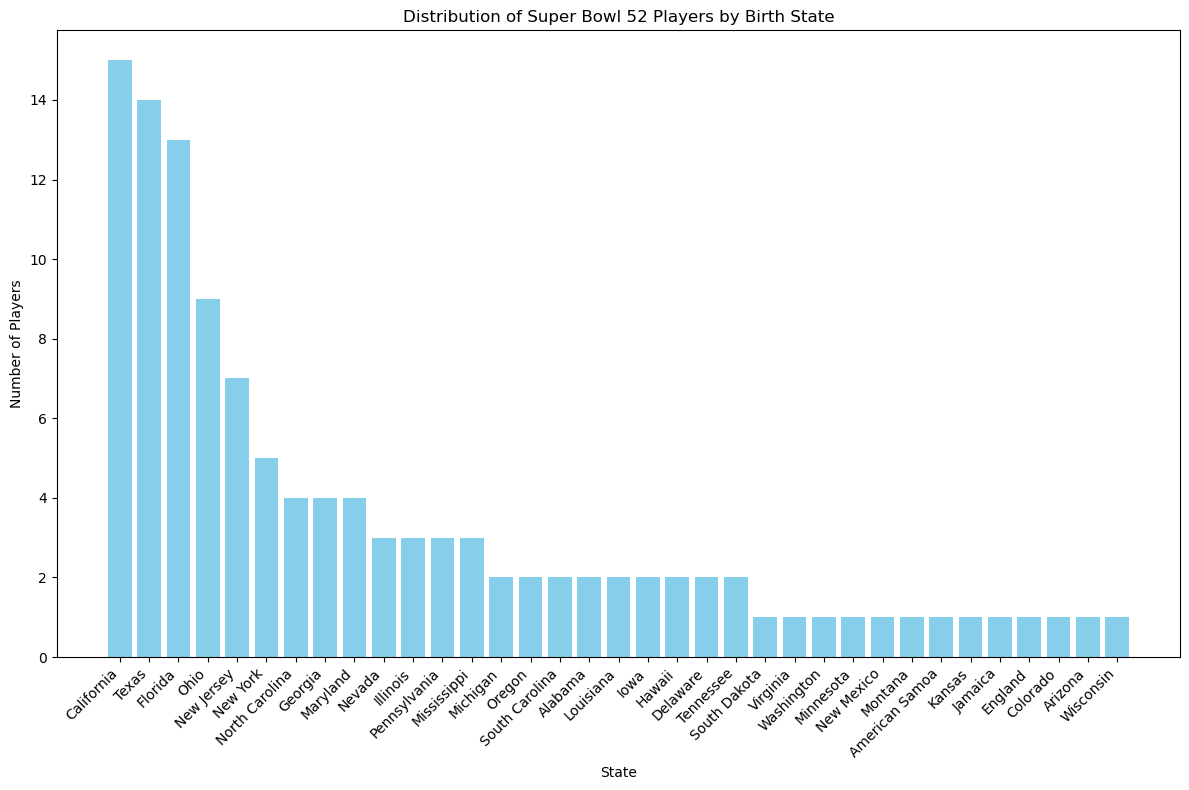

In [13]:
plt.figure(figsize=(12, 8))
plt.bar(state_distribution['Player Birth State'], state_distribution['Player Count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Players')
plt.title('Distribution of Super Bowl 52 Players by Birth State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Which states contributed the most players to Super Bowl 52

In [16]:
# Group by 'Player Birth State' and count the number of players
state_player_count = big_game_data.groupby('Player Birth State').size().reset_index(name='Player Count')
# Sort in descending order to find states with the most players
state_player_count = state_player_count.sort_values(by='Player Count', ascending=False)
# Display the top 5 states
top_states = state_player_count.head(5)
top_states

,Player Birth State,Player Count
3,California,15
31,Texas,14
7,Florida,13
25,Ohio,9
21,New Jersey,7


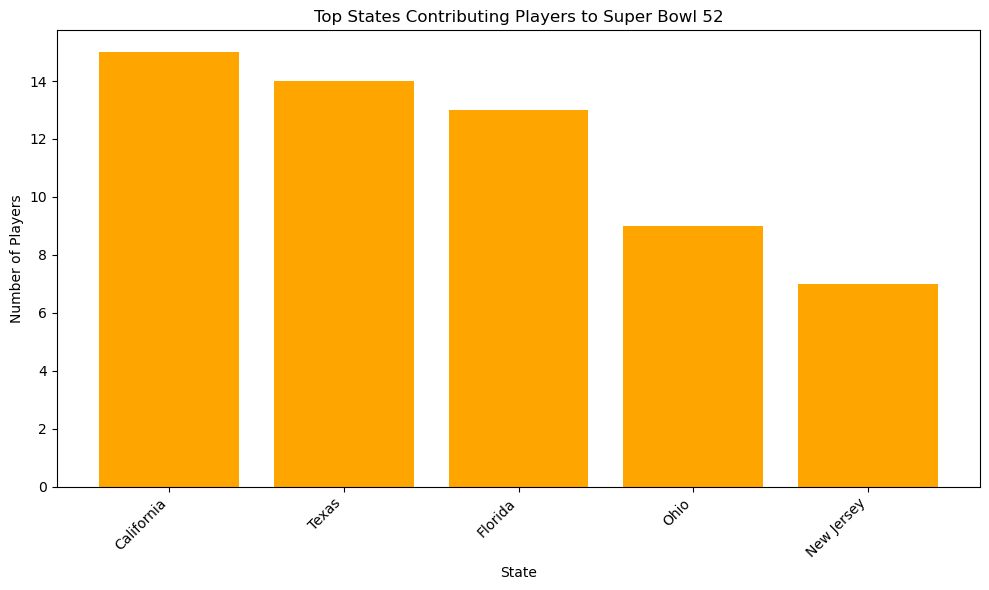

In [17]:

# Plot the top states
plt.figure(figsize=(10, 6))
plt.bar(top_states['Player Birth State'], top_states['Player Count'], color='orange')
plt.xlabel('State')
plt.ylabel('Number of Players')
plt.title('Top States Contributing Players to Super Bowl 52')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

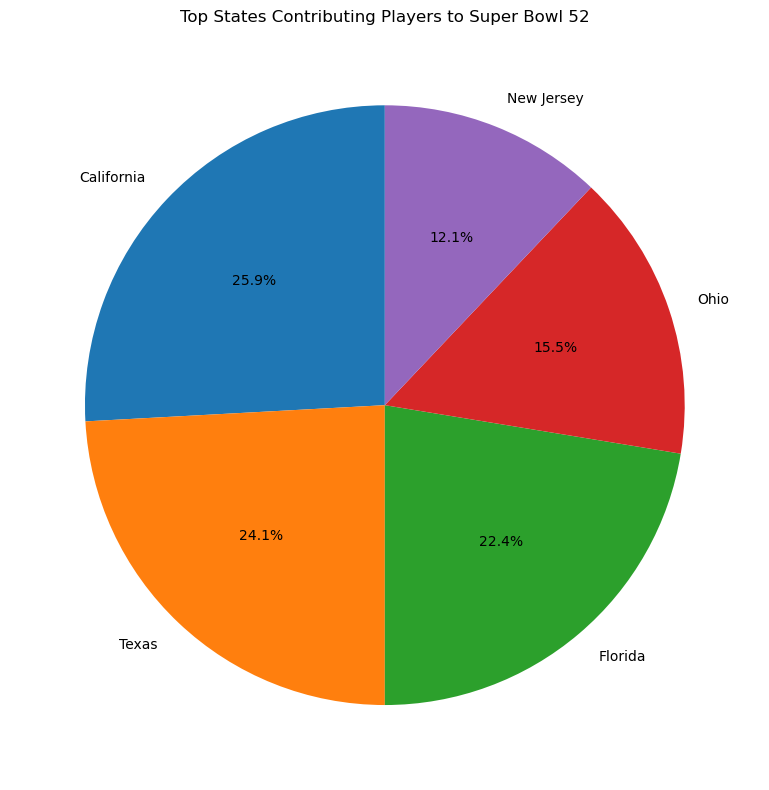

In [27]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_states['Player Count'], 
    labels=top_states['Player Birth State'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab10.colors
)
plt.title('Top States Contributing Players to Super Bowl 52')
plt.tight_layout()
plt.show()

## Are there states with no players represented in the game?


In [28]:
# List of all U.S. states
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
]


# Get unique states represented in the game
represented_states = big_game_data['Player Birth State'].dropna().unique()

# Find states with no players represented
no_players_states = set(us_states) - set(represented_states)

print("States with no players represented:")
print(no_players_states)

States with no players represented:
{'Idaho', 'Connecticut', 'Nebraska', 'Indiana', 'Kentucky', 'Utah', 'Vermont', 'Wyoming', 'New Hampshire', 'Alaska', 'Maine', 'Missouri', 'West Virginia', 'Massachusetts', 'Oklahoma', 'Arkansas', 'Rhode Island', 'North Dakota'}
